# Computer Vision 2023 Assignment 3: Deep Learning for Perception Tasks

This assignment contains 2 questions. The first question probes understanding of deep learning for classification. The second question is a more challenging classification experiment on a larger dataset. Answer the questions in separate Python notebooks.

## Question 1: A simple classifier, 20 marks

For this exercise, we provide demo code showing how to train a network on a small dataset called [Fashion-MNIST](https://github.com/zalandoresearch/fashion-mnist). Please run through the code "tutorial-style" to get a sense of what it is doing. Then use the code alongside lecture notes and other resources to understand how to use pytorch libraries to implement, train and use a neural network.

For the Fashion-MNIST dataset the lables from 0-9 correspond to various clothing classes so you might find it convenient to create a python list as follows:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

You will need to answer various questions about the system, how it operates, the results of experiments with it and make modifications to it yourself. You can change the training scheme and the network structure.

Organize your own text and code cell to show the answer of each questions.

Detailed requirements:

**Q1.1 (1 point)**

Extract 3 images of different types of clothing from the training dataset, print out the size/shape of the training images, and display the three with their corresponding labels.

**Q1.2 (2 points)**

Run the training code for 10 epochs, for different values of the learning rate. Fill in the table below and plot the loss curves for each experiment:

|Lr|Accuracy|
|---|---|
|1   |10%|
|0.1|87.3|
|0.01|83.9%|
|0.001  |70.5%|


**Q1.3 (3 points)**

Report the number of epochs when the accuracy reaches 85%. Fill in the table below and plot the loass curve for each experiment:

|Lr|Accuracy|Epoch|
|---|---|---|
|1   |nan|nan|
|0.1|85.4%|4|
|0.01|85.2%|16|
|0.001  |82%|41|


**Q1.4 (2 points)**

Based on the provided notebook content, I couldn't locate "table 1" or "table 2" explicitly. The understanding of learning rate typically comes from observing how the model's performance varies with different learning rates. A high learning rate might make the model converge faster but can overshoot the optimal solution, leading to oscillation or divergence. A low learning rate might converge to a better solution but can take longer and might get stuck in local minima. Without the tables, it's challenging to make a definitive observation.

We don't have the explicit tables to make direct observations. However, from the general knowledge of learning rates: the right learning rate is crucial for training a model. If it's too high, the model might not converge, and if it's too low, the model might take too long to converge or get stuck in local optima.


**Q1.5 (5 points)**

The base model structure you provided consists of two hidden layers, each with 512 perceptrons. For the wider network, you could double the perceptrons in each hidden layer (e.g., 1024). For the deeper network, you could add more hidden layers (e.g., two additional layers with 512 perceptrons each). The effect of making a network wider or deeper can vary. A wider network can capture more features, but it also has more parameters, which can lead to overfitting. A deeper network can capture more complex representations but might also be harder to train due to vanishing or exploding gradients.


|Structures|Accuracy|
|---|---|
|Base   |86.1%|
|Deeper|84.1%|
|Wider|84.6%|


**Q1.6 (2 points)**

the magnitude of gradients to decrease as training progresses, especially when using techniques like gradient clipping or normalization. This is because as the model approaches a minimum in the loss surface, the gradient (or slope) tends to decrease.

it's typical for the mean of gradients to decrease as training progresses, especially if the model is converging. This phenomenon can be attributed to the model getting closer to a local minimum where the slope of the loss curve is smaller.

**Q1.7 (5 points)**

By transitioning to a CNN for image data, we would expect:

Convergence: Faster convergence compared to the MLP, especially if the architecture is designed optimally for the given dataset.
Accuracy: Potentially higher accuracy. The MLP in the notebook achieved around 85.2% accuracy after 17 epochs. A well-designed CNN might surpass this accuracy in fewer epochs because it can exploit the spatial structure of images.
Number of Parameters: CNNs can achieve good performance with fewer parameters compared to MLPs for image data. Convolutional layers share weights across spatial locations, which reduces the number of parameters. This, combined with pooling layers, allows CNNs to be more parameter-efficient than MLPs for image tasks.
In conclusion, while MLPs are versatile and can work for a range of tasks, CNNs are specialized for image data and typically outperform MLPs in terms of convergence speed, accuracy, and parameter efficiency for image classification tasks.

In [1]:
import numpy as np # This is for mathematical operations

# this is used in plotting
import matplotlib.pyplot as plt
import time
import pylab as pl
from IPython import display

%matplotlib inline

%load_ext autoreload
%autoreload 2
%reload_ext autoreload

In [2]:
#### Tutorial Code
####PyTorch has two primitives to work with data: torch.utils.data.DataLoader and torch.utils.data.Dataset.
#####Dataset stores samples and their corresponding labels, and DataLoader wraps an iterable around the Dataset.
import torch
from torch import nn
from torch.utils.data import DataLoader
from torchvision import datasets
from torchvision.transforms import ToTensor, Lambda, Compose
import matplotlib.pyplot as plt

# Download training data from open datasets.
##Every TorchVision Dataset includes two arguments:
##transform and target_transform to modify the samples and labels respectively.

training_data = datasets.FashionMNIST(
    root="data",
    train=True,
    download=True,
    transform=ToTensor(),
)

# Download test data from open datasets.
test_data = datasets.FashionMNIST(
    root="data",
    train=False,
    download=True,
    transform=ToTensor(),
)

100%|██████████| 26421880/26421880 [00:01<00:00, 18118936.84it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 313474.60it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:00<00:00, 6106198.86it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 15067883.46it/s]


Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



**NOTE**: For consistency with the original data set, we call our validation data "test_data". It is important to keep in mind though that we are using the data for model validation and not for testing the final, trained model (which requires data not used when training the model parameters).

We pass the Dataset as an argument to DataLoader. This wraps an iterable over our dataset and supports automatic batching, sampling, shuffling, and multiprocess data loading. Here we define a batch size of 64, i.e. each element in the dataloader iterable will return a batch of 64 features and labels.

In [3]:
batch_size = 64

# Create data loaders.
train_dataloader = DataLoader(training_data, batch_size=batch_size)
test_dataloader = DataLoader(test_data, batch_size=batch_size)

for X, y in test_dataloader:
    print("Shape of X [N, C, H, W]: ", X.shape)
    print("Shape of y: ", y.shape, y.dtype)
    break

Shape of X [N, C, H, W]:  torch.Size([64, 1, 28, 28])
Shape of y:  torch.Size([64]) torch.int64


Add in a code cell to inspect the training data, as per Q1.1. Each element of the training_data structure has a greyscale image (which you can use plt.imshow(img[0,:,:]) to display, just like you did in previous assignments.  

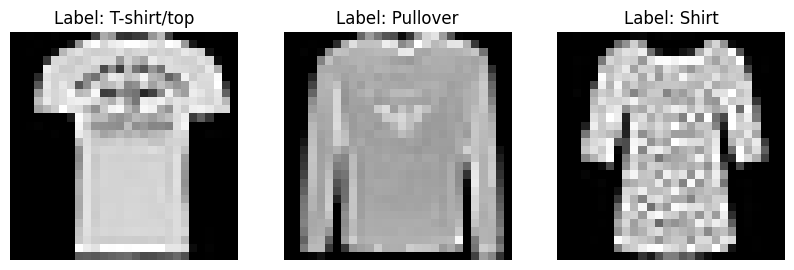

Size/shape of the training images: (torch.Size([1, 28, 28]), torch.Size([1, 28, 28]), torch.Size([1, 28, 28]))


In [4]:
# Code cell for training image display
# For reproducibility, we set a seed
np.random.seed(0)

# Define class names
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# Select three random indices from the training set
indices = np.random.choice(np.arange(len(training_data)), size=3, replace=False)

# Extract the images and labels at these indices
images, labels = zip(*[(training_data[i][0], training_data[i][1]) for i in indices])

# Display the images along with their labels
plt.figure(figsize=(10, 10))
for i, (img, label) in enumerate(zip(images, labels)):
    plt.subplot(1, 3, i+1)
    plt.imshow(img.squeeze(), cmap='gray')
    plt.title(f'Label: {class_names[label]}')
    plt.axis('off')
plt.show()

# Print out the size/shape of the training images
print(f'Size/shape of the training images: {images[0].shape, images[1].shape, images[2].shape}')

To define a neural network in PyTorch, we create a class that inherits from nn.Module. We define the layers of the network in the init function and specify how data will pass through the network in the forward function. To accelerate operations in the neural network, we move it to the GPU if available.

In [5]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

import torch.nn.functional as F

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
       )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        return logits

model = NeuralNetwork().to(device)
print(model)
###Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)


In a single training loop, the model makes predictions on the training dataset (fed to it in batches), and backpropagates the prediction error to adjust the model’s parameters.

In [28]:

def train(dataloader, model, loss_fn, optimizer):
   size = len(dataloader.dataset)
   model.train()
   for batch, (X, y) in enumerate(dataloader):
       X, y = X.to(device), y.to(device)

       # Compute prediction error
       pred = model(X)
       loss = loss_fn(pred, y)

       # Backpropagation
       optimizer.zero_grad()
       loss.backward()
       optimizer.step()

       if batch % 100 == 0:
           loss, current = loss.item(), batch * len(X)
           print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")

In [29]:

##Define a test function
def test(dataloader, model, loss_fn):
   size = len(dataloader.dataset)
   num_batches = len(dataloader)
   model.eval()
   test_loss, correct = 0, 0
   with torch.no_grad():
       for X, y in dataloader:
           X, y = X.to(device), y.to(device)
           pred = model(X)
           test_loss += loss_fn(pred, y).item()
           correct += (pred.argmax(1) == y).type(torch.float).sum().item()
   test_loss /= num_batches
   correct /= size
   print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")
   accuracy = 100 * correct
   return accuracy

In [8]:
#Train and test the model
epochs = 10
for t in range(epochs):
   print(f"Epoch {t+1}\n-------------------------------")
   train(train_dataloader, model, loss_fn, optimizer)
   test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.305051  [    0/60000]
loss: 2.294589  [ 6400/60000]
loss: 2.270181  [12800/60000]
loss: 2.262200  [19200/60000]
loss: 2.251091  [25600/60000]
loss: 2.222082  [32000/60000]
loss: 2.221591  [38400/60000]
loss: 2.189676  [44800/60000]
loss: 2.186718  [51200/60000]
loss: 2.148047  [57600/60000]
Test Error: 
 Accuracy: 52.6%, Avg loss: 2.148241 

Epoch 2
-------------------------------
loss: 2.164877  [    0/60000]
loss: 2.150126  [ 6400/60000]
loss: 2.090534  [12800/60000]
loss: 2.096103  [19200/60000]
loss: 2.053148  [25600/60000]
loss: 2.004374  [32000/60000]
loss: 2.010968  [38400/60000]
loss: 1.937811  [44800/60000]
loss: 1.938913  [51200/60000]
loss: 1.853063  [57600/60000]
Test Error: 
 Accuracy: 57.5%, Avg loss: 1.863382 

Epoch 3
-------------------------------
loss: 1.908970  [    0/60000]
loss: 1.867917  [ 6400/60000]
loss: 1.754516  [12800/60000]
loss: 1.777957  [19200/60000]
loss: 1.684425  [25600/60000]
loss: 1.649145  [32000/600

In [9]:

###Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
#Train and test the model
epochs = 10
for t in range(epochs):
   print(f"Epoch {t+1}\n-------------------------------")
   train(train_dataloader, model, loss_fn, optimizer)
   test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.786213  [    0/60000]
loss: 0.837680  [ 6400/60000]
loss: 0.590872  [12800/60000]
loss: 0.774105  [19200/60000]
loss: 0.665956  [25600/60000]
loss: 0.647221  [32000/60000]
loss: 0.728808  [38400/60000]
loss: 0.690549  [44800/60000]
loss: 0.694700  [51200/60000]
loss: 0.625869  [57600/60000]
Test Error: 
 Accuracy: 78.3%, Avg loss: 0.630220 

Epoch 2
-------------------------------
loss: 0.556153  [    0/60000]
loss: 0.651962  [ 6400/60000]
loss: 0.440151  [12800/60000]
loss: 0.658872  [19200/60000]
loss: 0.583095  [25600/60000]
loss: 0.566074  [32000/60000]
loss: 0.606204  [38400/60000]
loss: 0.648799  [44800/60000]
loss: 0.656670  [51200/60000]
loss: 0.532411  [57600/60000]
Test Error: 
 Accuracy: 80.2%, Avg loss: 0.565963 

Epoch 3
-------------------------------
loss: 0.457837  [    0/60000]
loss: 0.561614  [ 6400/60000]
loss: 0.379442  [12800/60000]
loss: 0.596279  [19200/60000]
loss: 0.526094  [25600/60000]
loss: 0.525682  [32000/600

In [10]:

###Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
#Train and test the model
epochs = 10
for t in range(epochs):
   print(f"Epoch {t+1}\n-------------------------------")
   train(train_dataloader, model, loss_fn, optimizer)
   test(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 0.264302  [    0/60000]
loss: 0.458336  [ 6400/60000]
loss: 0.419187  [12800/60000]
loss: 0.453666  [19200/60000]
loss: 0.435457  [25600/60000]
loss: 0.467649  [32000/60000]
loss: 0.441791  [38400/60000]
loss: 0.505659  [44800/60000]
loss: 0.532343  [51200/60000]
loss: 0.408482  [57600/60000]
Test Error: 
 Accuracy: 80.2%, Avg loss: 0.512532 

Epoch 2
-------------------------------
loss: 0.378306  [    0/60000]
loss: 0.353530  [ 6400/60000]
loss: 0.320434  [12800/60000]
loss: 0.363611  [19200/60000]
loss: 0.354831  [25600/60000]
loss: 0.428024  [32000/60000]
loss: 0.360539  [38400/60000]
loss: 0.457708  [44800/60000]
loss: 0.484049  [51200/60000]
loss: 0.384798  [57600/60000]
Test Error: 
 Accuracy: 82.0%, Avg loss: 0.472315 

Epoch 3
-------------------------------
loss: 0.311382  [    0/60000]
loss: 0.311404  [ 6400/60000]
loss: 0.261239  [12800/60000]
loss: 0.318021  [19200/60000]
loss: 0.326600  [25600/60000]
loss: 0.392582  [32000/600

In [ ]:

# Continuous training (with learning rate of 1e-2 and reset epochs) until 85% accuracy is reached. Uncomment with caution.

###Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)
#Train and test the model
epochs = 10
for t in range(epochs):
   print(f"Epoch {t+1}\n-------------------------------")
   train(train_dataloader, model, loss_fn, optimizer)
   test(test_dataloader, model, loss_fn)
print("Done!")

#### Not error! stopped due to long run

In [33]:
model = NeuralNetwork().to(device)
accuracy = 0
epochs = 0
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-3)
print(model)
while accuracy < 85:
    epochs += 1
    print(f"Epoch {epochs}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    accuracy = test(test_dataloader, model, loss_fn)
print("Reached 85%!")

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 2.307220  [    0/60000]
loss: 2.300772  [ 6400/60000]
loss: 2.278410  [12800/60000]
loss: 2.268526  [19200/60000]
loss: 2.255439  [25600/60000]
loss: 2.230573  [32000/60000]
loss: 2.234200  [38400/60000]
loss: 2.210332  [44800/60000]
loss: 2.200852  [51200/60000]
loss: 2.176293  [57600/60000]
Test Error: 
 Accuracy: 36.6%, Avg loss: 2.168736 

Epoch 2
-------------------------------
loss: 2.181588  [    0/60000]
loss: 2.177444  [ 6400/60000]
loss: 2.124738  [12800/60000]
loss: 2.130000  [19200/60000]
loss: 2.078987  [25600/60000]
loss: 2.031876  [32000/60000]
loss: 2.051588  [38400/60000]
loss: 1.992609  [44800/60000]
loss: 1.9

KeyboardInterrupt: ignored

In [14]:
# Base Neural Network model definition and training/testing.
model = NeuralNetwork().to(device)
print(model)
# Another variant of continuous training until 85% accuracy is reached with a learning rate of 1. Uncomment with caution.

###Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-2)
#Train and test the model
accuracy = 0
epochs = 0
while accuracy < 85:
   print(f"Epoch {epochs+1}\n-------------------------------")
   train(train_dataloader, model, loss_fn, optimizer)
   accuracy = test(test_dataloader, model, loss_fn)
   epochs+=1
print("Reached 85%!")

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 2.311011  [    0/60000]
loss: 2.168901  [ 6400/60000]
loss: 1.814378  [12800/60000]
loss: 1.508670  [19200/60000]
loss: 1.139821  [25600/60000]
loss: 1.042405  [32000/60000]
loss: 1.013444  [38400/60000]
loss: 0.877162  [44800/60000]
loss: 0.875890  [51200/60000]
loss: 0.821754  [57600/60000]
Test Error: 
 Accuracy: 71.3%, Avg loss: 0.794727 

Epoch 2
-------------------------------
loss: 0.810360  [    0/60000]
loss: 0.859012  [ 6400/60000]
loss: 0.579982  [12800/60000]
loss: 0.781193  [19200/60000]
loss: 0.676172  [25600/60000]
loss: 0.635751  [32000/60000]
loss: 0.729379  [38400/60000]
loss: 0.691606  [44800/60000]
loss: 0.7

In [30]:

# Base Neural Network model definition and training/testing.
model = NeuralNetwork().to(device)
print(model)
###Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
#Train and test the model
epochs = 0
accuracy=0
while accuracy < 85:
    print(f"Epoch {epochs+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    accuracy = test(test_dataloader, model, loss_fn)
    epochs+=1
print("Reached 85%!")

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 2.292328  [    0/60000]
loss: 0.895397  [ 6400/60000]
loss: 0.573958  [12800/60000]
loss: 0.693625  [19200/60000]
loss: 0.598871  [25600/60000]
loss: 0.499419  [32000/60000]
loss: 0.544398  [38400/60000]
loss: 0.601305  [44800/60000]
loss: 0.609945  [51200/60000]
loss: 0.467853  [57600/60000]
Test Error: 
 Accuracy: 79.2%, Avg loss: 0.549600 

Epoch 2
-------------------------------
loss: 0.434148  [    0/60000]
loss: 0.438480  [ 6400/60000]
loss: 0.376246  [12800/60000]
loss: 0.437265  [19200/60000]
loss: 0.411576  [25600/60000]
loss: 0.443233  [32000/60000]
loss: 0.414029  [38400/60000]
loss: 0.508594  [44800/60000]
loss: 0.4

In [ ]:

# Wider Neural Network model definition and training/testing.
model = NeuralNetwork().to(device)
print(model)
###Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)
#Train and test the model
epochs = 0
accuracy=0
while accuracy < 85:
    print(f"Epoch {epochs+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    accuracy = test(test_dataloader, model, loss_fn)
    epochs+=1
print("Reached 85%!")

In [17]:
# Get cpu or gpu device for training.
device = "cuda" if torch.cuda.is_available() else "cpu"
print("Using {} device".format(device))

import torch.nn.functional as F

# Define model
class NeuralNetwork(nn.Module):
    def __init__(self):
        super(NeuralNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
       )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)

        return logits

model = NeuralNetwork().to(device)
print(model)

###Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
#Train and test the model
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

Using cpu device
NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 2.309982  [    0/60000]
loss: 0.902847  [ 6400/60000]
loss: 0.593169  [12800/60000]
loss: 0.700042  [19200/60000]
loss: 0.604879  [25600/60000]
loss: 0.508695  [32000/60000]
loss: 0.535796  [38400/60000]
loss: 0.597670  [44800/60000]
loss: 0.583273  [51200/60000]
loss: 0.449860  [57600/60000]
Test Error: 
 Accuracy: 79.1%, Avg loss: 0.554113 

Epoch 2
-------------------------------
loss: 0.435844  [    0/60000]
loss: 0.451145  [ 6400/60000]
loss: 0.382021  [12800/60000]
loss: 0.433599  [19200/60000]
loss: 0.417255  [25600/60000]
loss: 0.457310  [32000/60000]
loss: 0.410194  [38400/60000]
loss: 0.503276  [44800

In [18]:
# Define model
class WiderNetwork(nn.Module):
    def __init__(self):
        super(WiderNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 1024),
            nn.ReLU(),
            nn.Linear(1024, 1024),
            nn.ReLU(),
            nn.Linear(1024, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = WiderNetwork().to(device)
print(model)

###Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
#Train and test the model
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

WiderNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 2.299390  [    0/60000]
loss: 0.853229  [ 6400/60000]
loss: 0.551594  [12800/60000]
loss: 0.694315  [19200/60000]
loss: 0.603761  [25600/60000]
loss: 0.514994  [32000/60000]
loss: 0.542830  [38400/60000]
loss: 0.597923  [44800/60000]
loss: 0.587798  [51200/60000]
loss: 0.447721  [57600/60000]
Test Error: 
 Accuracy: 79.2%, Avg loss: 0.544967 

Epoch 2
-------------------------------
loss: 0.429813  [    0/60000]
loss: 0.425048  [ 6400/60000]
loss: 0.360076  [12800/60000]
loss: 0.431047  [19200/60000]
loss: 0.410044  [25600/60000]
loss: 0.446541  [32000/60000]
loss: 0.405289  [38400/60000]
loss: 0.505736  [44800/60000]
loss: 

In [19]:
# Define model
class DeeperNetwork(nn.Module):
    def __init__(self):
        super(DeeperNetwork, self).__init__()
        self.flatten = nn.Flatten()
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(28*28, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 512),
            nn.ReLU(),
            nn.Linear(512, 10)
        )

    def forward(self, x):
        x = self.flatten(x)
        logits = self.linear_relu_stack(x)
        return logits

model = DeeperNetwork().to(device)
print(model)

###Define the loss function and the optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
#Train and test the model
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

DeeperNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------
loss: 2.302132  [    0/60000]
loss: 1.044089  [ 6400/60000]
loss: 0.663632  [12800/60000]
loss: 0.739845  [19200/60000]
loss: 0.600416  [25600/60000]
loss: 0.503679  [32000/60000]
loss: 0.552030  [38400/60000]
loss: 0.593918  [44800/60000]
loss: 0.596686  [51200/60000]
loss: 0.470685  [57600/60000]
Test Error: 
 Accuracy: 79.8%, Avg loss: 0.538680 

Epoch 2
-------------------------------
loss: 0.413882  [    0/60000]
loss: 0.465054  [ 6400/60000]
loss: 0.435434  [12800/60000]
loss: 0.439661  [19200/60000]
loss: 0.397399  [25600/60000]
loss: 0.440500  [3200

In [21]:

def train(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)
    model.train()
    gradient_means = []
    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)

        # Compute prediction error
        pred = model(X)
        loss = loss_fn(pred, y)

        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        # 3. After loss.backward(), compute the mean gradient and store it
        total_gradient = 0
        num_params = 0
        for param in model.parameters():
            if param.grad is not None:
                total_gradient += torch.sum(param.grad)
                num_params += torch.numel(param.grad)
        gradient_mean = total_gradient / num_params
        gradient_means.append(gradient_mean.item())

        optimizer.step()

        # Optionally, if you only want to capture the first 100 steps:
        if len(gradient_means) >= 100:
            break
            # 4. After the training loop, plot the gradient_means:
    plt.plot(gradient_means)
    plt.xlabel('Training Step')
    plt.ylabel('Mean Gradient')
    plt.title('Mean Gradient over Training Steps')
    plt.show()


DeeperNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=512, bias=True)
    (5): ReLU()
    (6): Linear(in_features=512, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------


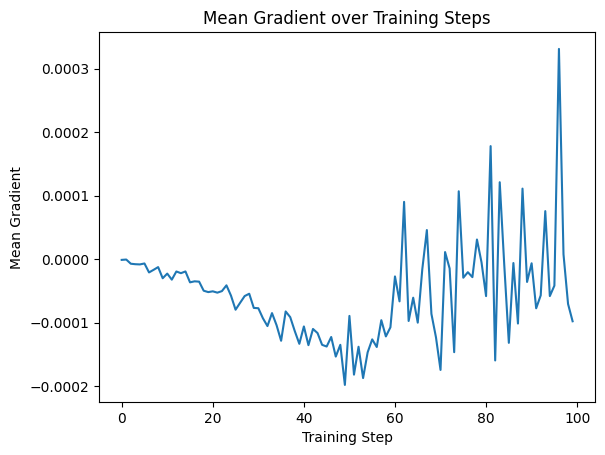

Test Error: 
 Accuracy: 61.8%, Avg loss: 0.985368 

Epoch 2
-------------------------------


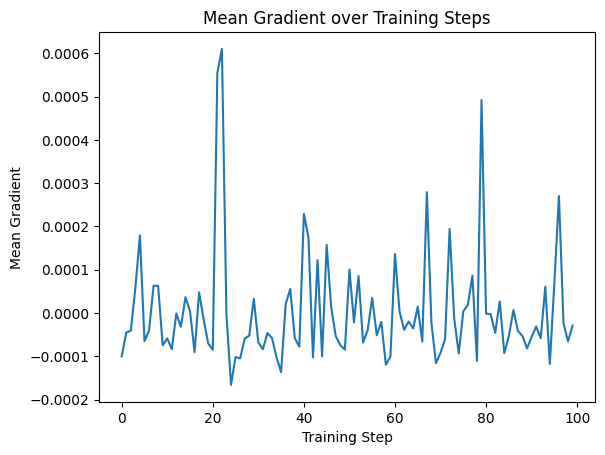

Test Error: 
 Accuracy: 67.7%, Avg loss: 0.760684 

Epoch 3
-------------------------------


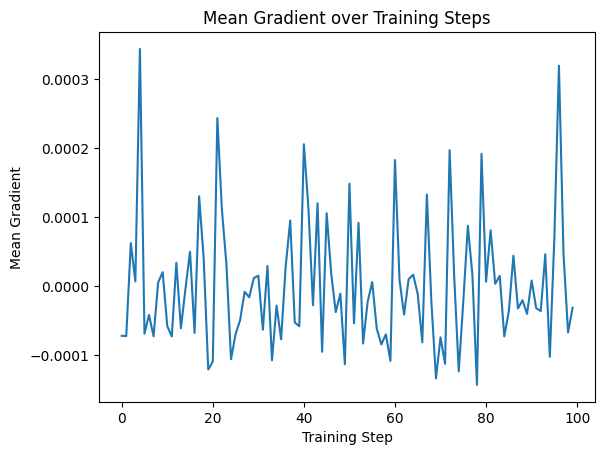

Test Error: 
 Accuracy: 74.3%, Avg loss: 0.658502 

Epoch 4
-------------------------------


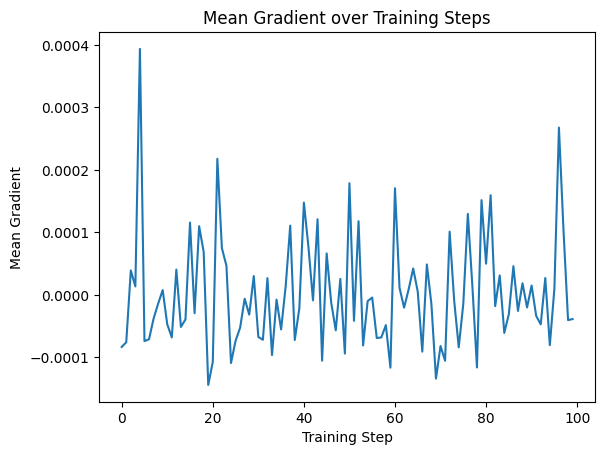

Test Error: 
 Accuracy: 77.9%, Avg loss: 0.598488 

Epoch 5
-------------------------------


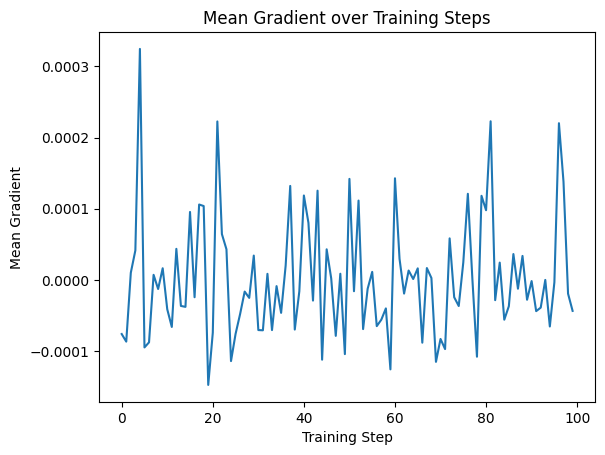

Test Error: 
 Accuracy: 79.5%, Avg loss: 0.562461 

Done!


In [22]:
model = DeeperNetwork().to(device)
print(model)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

WiderNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=1024, bias=True)
    (1): ReLU()
    (2): Linear(in_features=1024, out_features=1024, bias=True)
    (3): ReLU()
    (4): Linear(in_features=1024, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------


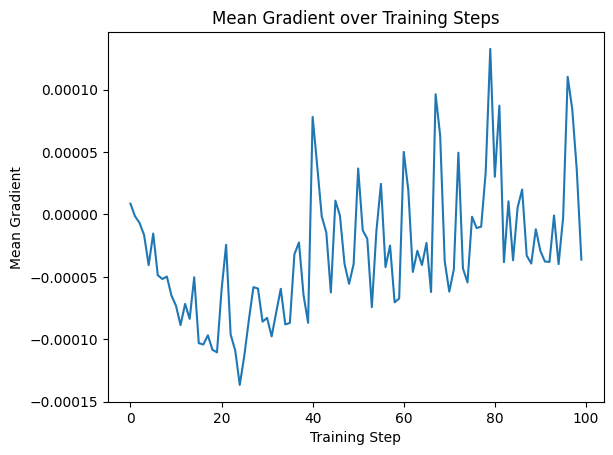

Test Error: 
 Accuracy: 68.2%, Avg loss: 0.796971 

Epoch 2
-------------------------------


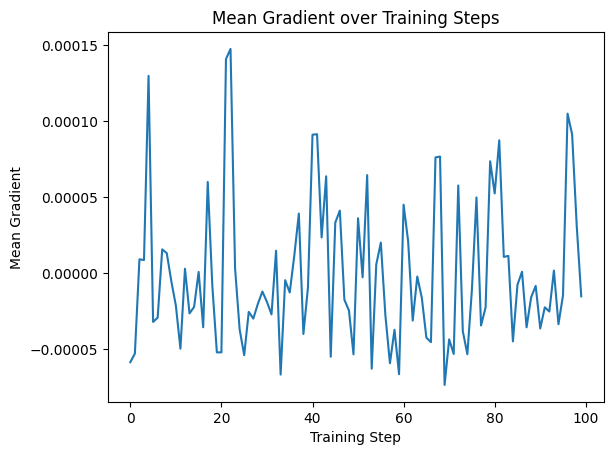

Test Error: 
 Accuracy: 76.2%, Avg loss: 0.652406 

Epoch 3
-------------------------------


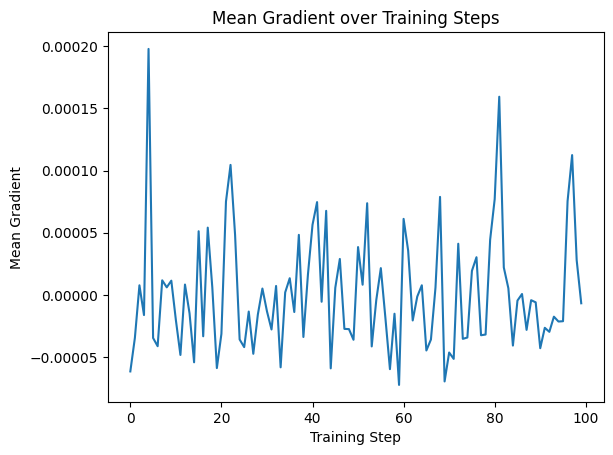

Test Error: 
 Accuracy: 79.2%, Avg loss: 0.585110 

Epoch 4
-------------------------------


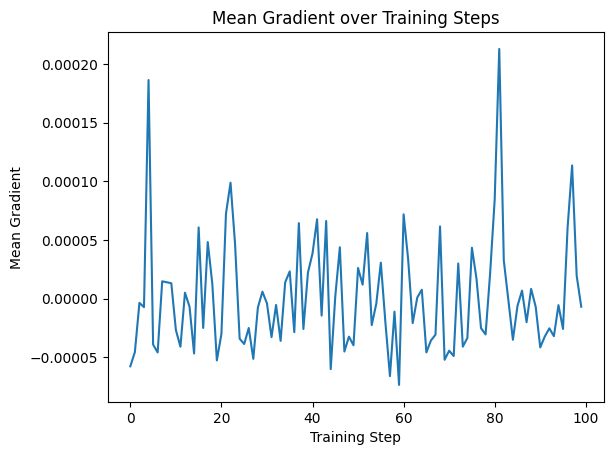

Test Error: 
 Accuracy: 80.8%, Avg loss: 0.547688 

Epoch 5
-------------------------------


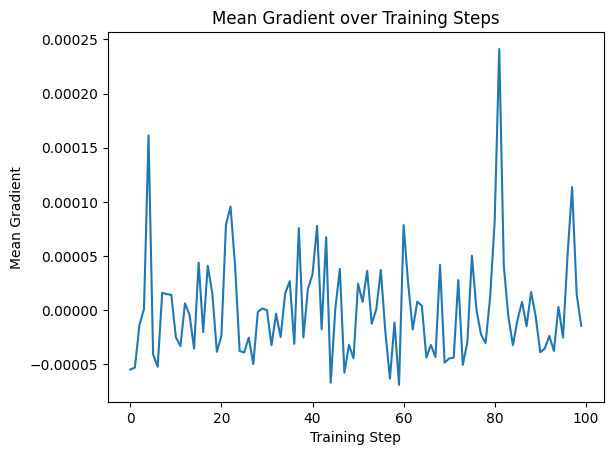

Test Error: 
 Accuracy: 81.6%, Avg loss: 0.522314 

Done!


In [23]:
model = model = WiderNetwork().to(device)
print(model)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

NeuralNetwork(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear_relu_stack): Sequential(
    (0): Linear(in_features=784, out_features=512, bias=True)
    (1): ReLU()
    (2): Linear(in_features=512, out_features=512, bias=True)
    (3): ReLU()
    (4): Linear(in_features=512, out_features=10, bias=True)
  )
)
Epoch 1
-------------------------------


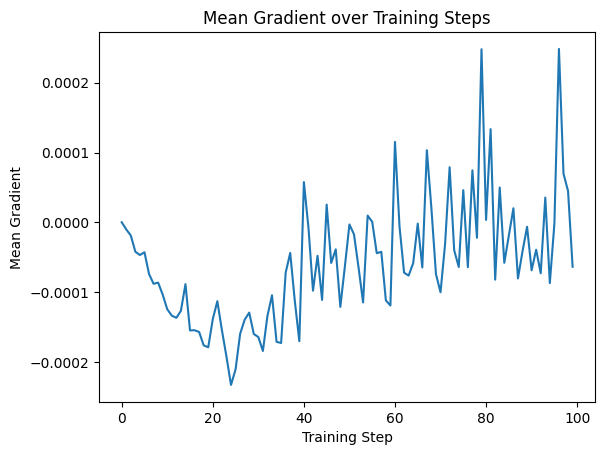

Test Error: 
 Accuracy: 66.2%, Avg loss: 0.819793 

Epoch 2
-------------------------------


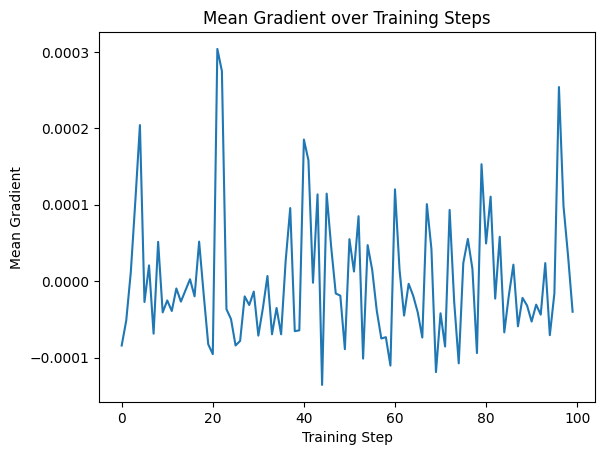

Test Error: 
 Accuracy: 74.4%, Avg loss: 0.673909 

Epoch 3
-------------------------------


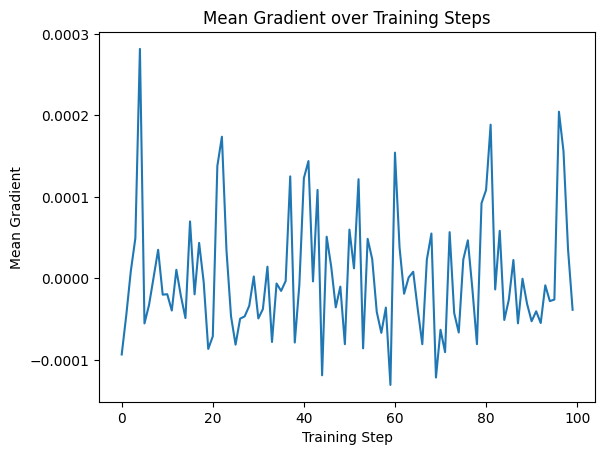

Test Error: 
 Accuracy: 78.6%, Avg loss: 0.600027 

Epoch 4
-------------------------------


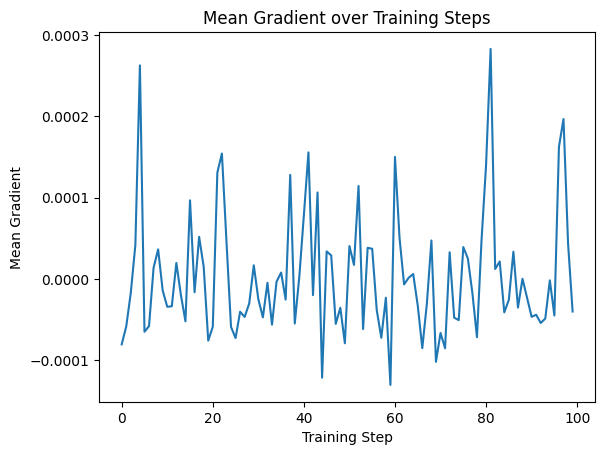

Test Error: 
 Accuracy: 80.1%, Avg loss: 0.557971 

Epoch 5
-------------------------------


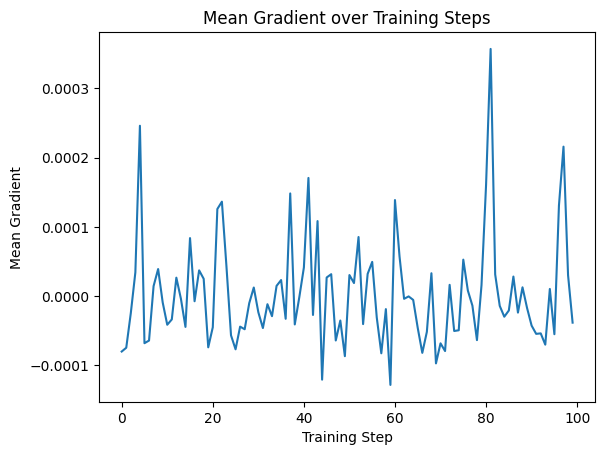

Test Error: 
 Accuracy: 81.2%, Avg loss: 0.531368 

Done!


In [24]:
model = NeuralNetwork().to(device)
print(model)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1e-1)
epochs = 5
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train(train_dataloader, model, loss_fn, optimizer)
    test(test_dataloader, model, loss_fn)
print("Done!")

In [26]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

# Define the CNN architecture
class SimpleCNN(nn.Module):
    def __init__(self):
        super(SimpleCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, 1, padding=1, bias=False)
        self.conv2 = nn.Conv2d(16, 32, 3, 1, padding=1, bias=False)
        self.linear = nn.Linear(32*10*10, 20, bias=False)

    def forward(self, x):
        x1 = self.conv1(x)
        x2 = self.conv2(x1)
        x3 = self.linear(x2.view(x2.size(0), -1))
        return x3

# Load the dataset
transform = transforms.Compose([
    transforms.Resize((10, 10)),
    transforms.ToTensor(),
])

train_data = datasets.FashionMNIST(root="data", train=True, download=True, transform=transform)
test_data = datasets.FashionMNIST(root="data", train=False, download=True, transform=transform)

train_loader = DataLoader(train_data, batch_size=64, shuffle=True)
test_loader = DataLoader(test_data, batch_size=64, shuffle=False)

# Initialize model, criterion, and optimizer
model_cnn = SimpleCNN()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model_cnn.parameters(), lr=0.01)

# Define the training loop
def train_cnn(model, train_loader, criterion, optimizer):
    model.train()
    total_loss = 0.0
    for images, targets in train_loader:
        optimizer.zero_grad()
        output = model(images)
        loss = criterion(output, targets)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    avg_loss = total_loss / len(train_loader)
    return avg_loss

# Define the evaluation loop
def evaluate_cnn(model, test_loader, criterion):
    model.eval()
    total_loss = 0.0
    correct_predictions = 0
    with torch.no_grad():
        for images, targets in test_loader:
            output = model(images)
            loss = criterion(output, targets)
            total_loss += loss.item()
            _, predicted = torch.max(output, 1)
            correct_predictions += (predicted == targets).sum().item()
    avg_loss = total_loss / len(test_loader)
    accuracy = correct_predictions / len(test_data)
    return avg_loss, accuracy

# Train and evaluate the model
epochs = 5
for epoch in range(epochs):
    train_loss = train_cnn(model_cnn, train_loader, criterion, optimizer)
    test_loss, test_accuracy = evaluate_cnn(model_cnn, test_loader, criterion)
    print(f"Epoch {epoch+1}, Train Loss: {train_loss:.4f}, Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}")

Epoch 1, Train Loss: 1.0023, Test Loss: 0.7787, Test Accuracy: 0.7136
Epoch 2, Train Loss: 0.7085, Test Loss: 0.6815, Test Accuracy: 0.7543
Epoch 3, Train Loss: 0.6435, Test Loss: 0.6739, Test Accuracy: 0.7596
Epoch 4, Train Loss: 0.6057, Test Loss: 0.6130, Test Accuracy: 0.7847
Epoch 5, Train Loss: 0.5833, Test Loss: 0.6550, Test Accuracy: 0.7642
